<a href="https://colab.research.google.com/github/emerymoriconi/processamento-digital-de-imagens/blob/main/processamento_digital_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ATIVIDADE PRÁTICA 01**

Aluna: Émery Freitas Moriconi - 20229004598

Departamento de Computação - UFPI

Disciplina: Processamento Digital de Imagens - 2023.2

Professor: Kelson R. T. Aires

**ALGUMAS RECOMENDAÇÕES IMPORTANTES:**

Para que a atividade seja bem avaliada, é necessário destacar que o Google Colab não mantém as fotos na sua área de arquivos permanentemente e é necessário que o upload dos arquivos seja realizado periodicamente. Por conta disso, foi criada uma pasta no Google Drive com os arquivos das fotos utilizadas na tarefa: a foto ‘aviao.png’, ‘lena_gray.bmp’, ‘einstein.jpg’ e ‘polen.png’. O link da pasta pode ser visto logo abaixo:

[Drive com fotos para Download](https://drive.google.com/drive/folders/1Gd3FHFvLIPtTcdDZBshdv7Td9hiDHIgX?usp=sharing)

Para a correção, é necessário que seja realizado o upload na área de arquivos do projeto, seguindo o seguinte tutorial: **Acesse a pasta do Drive com os arquivos das fotos para download  (link acima) > Faça o download das fotos > Agora nesse ambiente de execução do Colab, clique na parte de "Arquivos" do projeto, representado pelo símbolo de uma pasta no lado esquerdo da tela, bem abaixo do símbolo de chave > Clique em “Fazer upload para o armazenamento da sessão” > Selecione, nos arquivos do computador, as fotos baixadas anteriormente e aperte em “Abrir” > Pressione OK.**

É necessário lembrar que quando a sessão for encerrada, devido à inatividade por exemplo, será necessário fazer o upload dos arquivos outra vez, caso contrário, serão encontrados erros pela falta de localização dos arquivos usados na tarefa. Esse mesmo tutorial será encontrado no relatório.

É recomendado que, na hora da execução do código, ela seja feita em sequência, já que algumas vezes, um trecho de código depende do outro e desse modo, nenhum deve ser pulado. Portanto, é recomendado pressionar em **Ambiente de execução** no topo da tela e em **Executar tudo**. Mas se desejar executar tudo individualmente, é apenas importante lembrar que isso deve ser realizado em sequência.

In [ ]:
!pip install pillow

In [ ]:
!pip install matplotlib

In [ ]:
import PIL
from PIL import Image, ImageDraw
import pandas
from numpy import array
import numpy as np
from matplotlib import image
from matplotlib import pyplot

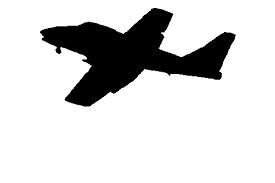

In [ ]:
aviao = Image.open("/content/aviao.png")
aviao


**1) a) FRONTEIRA COM ADJACÊNCIA-8**

Neste caso, a imagem da fronteira destaca todos os pixels na fronteira da região onde a cor muda. Isso incluirá pixels nas diagonais, bem como nas direções norte, leste, sul e oeste.

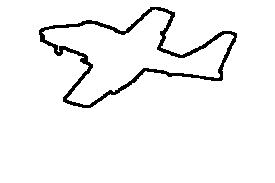

In [ ]:
import matplotlib.pyplot as plt

def encontrar_fronteira(imagem):

  largura, altura = imagem.size
  imagem_fronteira = Image.new("L", (largura, altura), 255)
  desenho = ImageDraw.Draw(imagem_fronteira)
  dados_imagem = imagem.load()

  for x in range(1, largura - 1):
        for y in range(1, altura - 1):
            pixel = dados_imagem[x, y]

            vizinhos = [
                #vizinhos em todas as direções do pixel em questão
                dados_imagem[x - 1, y - 1], dados_imagem[x, y - 1], dados_imagem[x + 1, y - 1],
                dados_imagem[x - 1, y],     pixel,               dados_imagem[x + 1, y],
                dados_imagem[x - 1, y + 1], dados_imagem[x, y + 1], dados_imagem[x + 1, y + 1]
            ]

            if any(v != pixel for v in vizinhos):
                desenho.point((x, y), fill=0)

  return imagem_fronteira

fronteira_aviao = encontrar_fronteira(aviao)

fronteira_aviao.save("fronteira_aviao.png")

fronteira_aviao

**1) b) FRONTEIRA COM ADJACÊNCIA-M**

No caso da adjacência-m, o traçado da fronteira da imagem evitará ambiguidades entre as adjacências 8 e 4, priorizando a adjacência-4. Isso priorizará pixels nas direções norte, leste, sul e oeste, sobre os pixels nas diagonais.

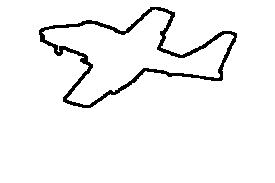

In [ ]:
import matplotlib.pyplot as plt

def encontrar_fronteira_m(imagem):

  largura, altura = imagem.size
  imagem_fronteira = Image.new("L", (largura, altura), 255)
  desenho = ImageDraw.Draw(imagem_fronteira)
  dados_imagem = imagem.load()

  for x in range(1, largura - 1):
        for y in range(1, altura - 1):
            pixel = dados_imagem[x, y]

            vizinhos = [
                dados_imagem[x, y - 1],  # Vizinho ao norte
                dados_imagem[x - 1, y],  # Vizinho à esquerda
                dados_imagem[x + 1, y],  # Vizinho à direita
                dados_imagem[x, y + 1],  # Vizinho ao sul
            ]

            # se os pixels vizinhos forem diferentes, ele será pintado (priorizando a adjacência-4)
            if any(v != pixel for v in vizinhos):
                desenho.point((x, y), fill=0)

            # se um pixel de fronteira não for detectado usando a adjacência-4, analisa-se os pixes da diagonal, usando agora a adjacência-8
            if(dados_imagem[x-1, y] == pixel and dados_imagem[x, y+1] == pixel and dados_imagem[x-1, y+1] != pixel):
              desenho.point((x,y), fill=0)
            if(dados_imagem[x+1, y] == pixel and dados_imagem[x, y+1] == pixel and dados_imagem[x+1, y+1] != pixel):
              desenho.point((x,y), fill=0)
            if(dados_imagem[x+1, y] == pixel and dados_imagem[x, y-1] == pixel and dados_imagem[x+1, y-1] != pixel):
              desenho.point((x,y), fill=0)
            if(dados_imagem[x-1, y] == pixel and dados_imagem[x, y-1] == pixel and dados_imagem[x-1, y-1] != pixel):
              desenho.point((x,y), fill=0)

  return imagem_fronteira

fronteira_aviao = encontrar_fronteira_m(aviao)

fronteira_aviao.save("fronteira_m_aviao.png")

fronteira_aviao

Não existem diferenças entre as imagens geradas como respostas dos questionamentos a) e b).

**2) a) HISTOGRAMA**

Um histograma de uma imagem é uma representação gráfica da distribuição das intensidades de pixels em uma imagem. Ele mostra quantos pixels da imagem têm uma determinada intensidade de cor ou nível de cinza, contribuindo para o entendimento das distribuições de tons de cinza dessa imagem.

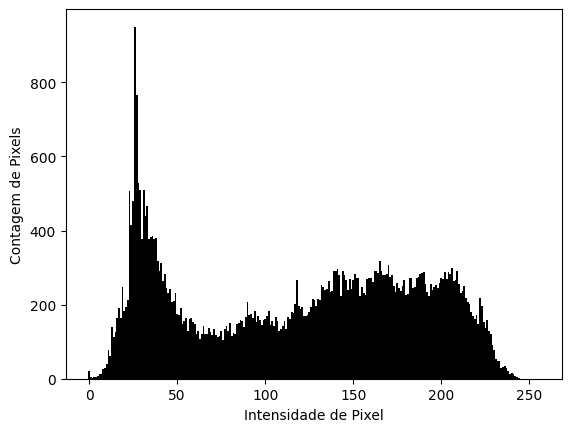

In [ ]:
import cv2
import matplotlib.pyplot as plt

#carregando a imagem
einstein = cv2.imread('/content/einstein.jpg', cv2.IMREAD_GRAYSCALE)

# função que gera um histograma de uma imagem
def histogram(imagem):
  #inicializamos um array vazio para o histograma com 256 bins (para uma imagem em escala de cinza)
  histo = [0] * 256
  #vamos percorrer todos os pixels da imagem e atualizamos o histograma
  height, width = imagem.shape
  for y in range(height):
      for x in range(width):
          #verifica a intensidade daquele pixel expecífico
          intensity = imagem[y, x]
          #vai incrementando as quantidades na posição da intensidade no grafico (0 a 255)
          histo[intensity] += 1
  return histo

histo = histogram(einstein)

#cria uma lista de valores de intensidade de pixel (0 a 255)
intensities = list(range(256))

#plotamos o histograma
plt.bar(intensities, histo, width=1.0, color='black')

#configuramos os rótulos do eixo x e y
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Contagem de Pixels')

#exibimos o gráfico do histograma
plt.show()

**2) b) HISTOGRAMA NORMALIZADO (f.d.p.)**

Um histograma normalizado de uma imagem é uma versão do histograma em que as contagens de pixels em cada intensidade são normalizadas para representar a proporção ou a probabilidade de cada intensidade em relação ao número total de pixels na imagem. Para isso, as contagens de pixels em cada intervalo de intensidade são divididas pelo número total de pixels na imagem. O resultado é uma distribuição que varia de 0 a 1 (ou de 0% a 100%), indicando a probabilidade ou a proporção de pixels em cada intensidade.

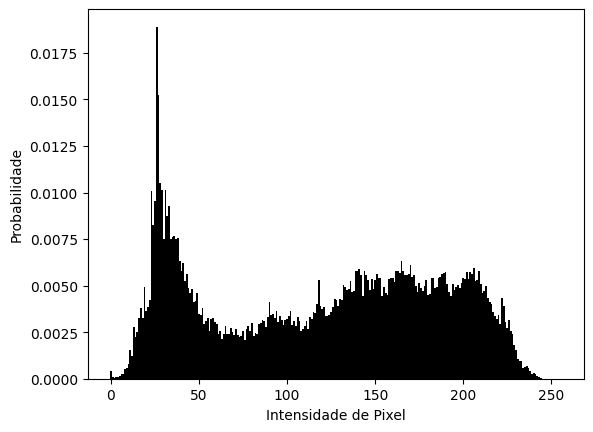

In [ ]:
import cv2
import matplotlib.pyplot as plt

einstein = cv2.imread('/content/einstein.jpg', cv2.IMREAD_GRAYSCALE)

# função que gera o histograma normalizado
def histogram_normalized(imagem):
  histogram = [0] * 256

  height, width = imagem.shape
  total_pixels = height * width
  for y in range(height):
      for x in range(width):
          intensity = imagem[y, x]
          histogram[intensity] += 1

  #normalizando o histograma
  histogram_norm = [count / total_pixels for count in histogram]

  return histogram_norm

histogram_norm = histogram_normalized(einstein)

intensities = list(range(256))

plt.bar(intensities, histogram_norm, width=1.0, color='black')

plt.xlabel('Intensidade de Pixel')
plt.ylabel('Probabilidade')

plt.show()

**2) c) HISTOGRAMA ACUMULADO (f.d.a.)**

Um histograma acumulado de uma imagem é uma representação gráfica que mostra a acumulação das contagens de pixels ao longo de uma faixa de intensidades. Isso significa que o valor em um determinado intervalo de intensidade no histograma acumulado representa o número total de pixels com intensidades menores ou iguais àquela intensidade, ou seja, a acumulação da frequência de aparição das intensidades ao longo do gráfico.

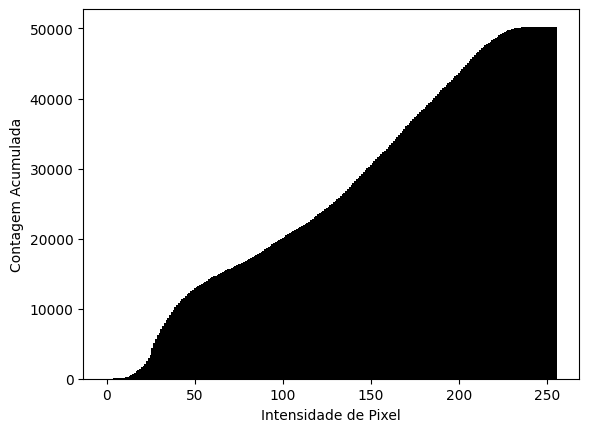

In [ ]:
import cv2
import matplotlib.pyplot as plt

einstein = cv2.imread('/content/einstein.jpg', cv2.IMREAD_GRAYSCALE)

# função que gera o histograma acumulado
def histogram_accumulated(imagem):
  histogram = [0] * 256

  height, width = imagem.shape
  total_pixels = height * width
  for y in range(height):
      for x in range(width):
          intensity = imagem[y, x]
          histogram[intensity] += 1

  #histograma acumulado
  histogram_accumulated = [sum(histogram[:i+1]) for i in range(len(histogram))]

  return histogram_accumulated

histogram_accumulated = histogram_accumulated(einstein)

intensities = list(range(256))

plt.bar(intensities, histogram_accumulated, width=1.0, color='black')

plt.xlabel('Intensidade de Pixel')
plt.ylabel('Contagem Acumulada')

plt.show()

**3) a)  EQUALIZAÇÃO DE IMAGENS**

O objetivo da equalização de imagens é redistribuir os níveis de intensidade dos pixels em uma imagem de modo a maximizar o contraste e tornar os detalhes mais perceptíveis.

In [ ]:
import cv2

#função de equalização
def equalizacao(image):

  largura, altura = image.shape
  #calculando o histograma da imagem com a função feita na 2ª questão letra a)
  histogram_image = histogram(image)

  cdf = [0] * 256

  #cálculo da função de distribuição cumulativa.
  # CDF = lista de 256 valores onde cada valor representa a soma acumulativa...
  #...dos valores do histograma até determinada intensidade.
  cdf = [sum(histogram_image[:i+1]) for i in range(256)]

  # Mapeia a CDF para o intervalo [0, 255]
  # A CDF "estica" a faixa de intensidade, obrigando os valores a ocuparem...
  #...toda a faixa de 0 a 255, tornando o valor mínimo da CDF original 0 na CDF...
  #... normalizada e o valor máximo da CDF original 255 na CDF normalizada.
  cdf_normalized = [round((x - min(cdf)) * 255) // (max(cdf) - min(cdf)) for x in cdf]

  # Equaliza a imagem
  equalized_image = Image.new('L', (altura, largura))
  # Mapeia os valores de intensidade da imagem original...
  #...usando a CDF normalizada.
  # A função ravel() é usada para transformar a imagem em um array unidimensional.
  equalized_pixels = [cdf_normalized[p] for p in image.ravel()]
  # Define os pixels da imagem equalizada com base nos valores mapeados.
  equalized_image.putdata(equalized_pixels)

  return equalized_image

**IMAGEM LENA ORIGINAL**

Imagem 'lena_gray.bpm' antes da equalização:

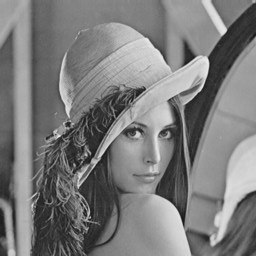

In [ ]:
lena = Image.open("/content/lena_gray.bmp")
lena

**IMAGEM LENA EQUALIZADA**

Aplicando agora a minha função **equalizacao()** na imagem 'lena_gray.bpm'.

Imagem após a equalização:

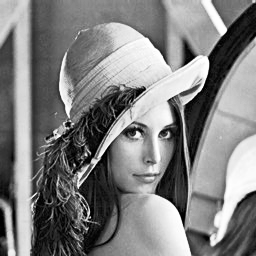

In [ ]:
lena = cv2.imread('/content/lena_gray.bmp', cv2.IMREAD_GRAYSCALE)
equalized_lena_final = equalizacao(lena)
equalized_lena_final.save('equalized_lena_final.png')
equalized_lena_final

**IMAGEM EINSTEIN ORIGINAL**

Imagem 'einstein.jpg' antes da equalização:

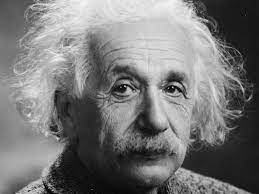

In [ ]:
einstein = Image.open('/content/einstein.jpg')
einstein

**IMAGEM EINSTEIN EQUALIZADA**

Aplicando agora a minha função **equalizacao()** na imagem 'einstein.jpg'.

Imagem após a equalização:

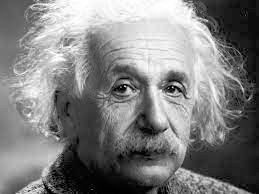

In [ ]:
einstein = cv2.imread('/content/einstein.jpg', cv2.IMREAD_GRAYSCALE)
equalized_einstein = equalizacao(einstein)
equalized_einstein.save('equalized_einstein.png')
equalized_einstein

**3) b)  EQUALIZAÇÃO DE IMAGENS EQUALIZADAS**

EINSTEIN

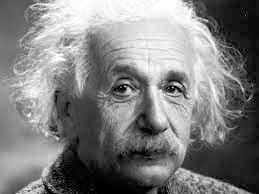

In [ ]:
einstein_equalized = cv2.imread('/content/equalized_einstein.png', cv2.IMREAD_GRAYSCALE)
einstein_equalized_2 = equalizacao(einstein_equalized)
einstein_equalized_2.save('equalized_twice_einstein.png')
einstein_equalized_2

LENA

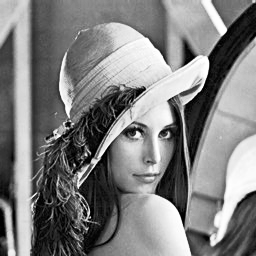

In [ ]:
lena_equalized = cv2.imread('/content/equalized_lena_final.png', cv2.IMREAD_GRAYSCALE)
lena_equalized_2 = equalizacao(lena_equalized)
lena_equalized_2.save('equalized_twice_lena.png')
lena_equalized_2

**4) APLICANDO TRANSFORMAÇÕES LINEARES EM IMAGENS**

 Transformações lineares são operações matemáticas que, quando aplicadas em uma imagem qualquer, afetam a disposição dos pixels na imagem.

**a) Função que calcula a primeira transformação:  g = c * f + b**

In [ ]:
def transformation_1(image, c, b):
  largura, altura = image.size
  pixels_image = image.load()

  new_image = Image.new("L", (largura, altura))
  data_new_image = new_image.load()

  for x in range(largura):
    for y in range(altura):
      data_new_image[x, y] = round(c*pixels_image[x, y]) + b

  return new_image

Aplicando sobre a imagem **polen.png**:

c = 0.2

b = 15

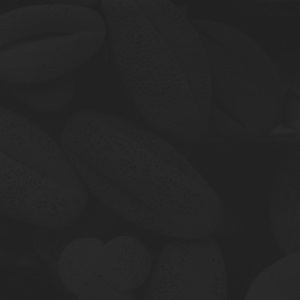

In [ ]:
polen = Image.open('/content/polen.png').convert('L')

polen_transformation_1 = transformation_1(polen, 0.2, 15)
polen_transformation_1

c = 1

b = 45

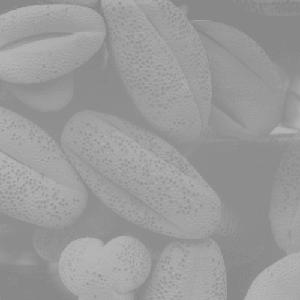

In [ ]:
polen_transformation_1 = transformation_1(polen, 1, 45)
polen_transformation_1

c = 2

b = 25

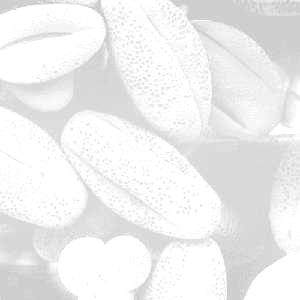

In [ ]:
polen_transformation_1 = transformation_1(polen, 2, 25)
polen_transformation_1

**b) Função que calcula a segunda transformação:   g = c * log2(f + 1)**

In [ ]:
def transformation_2(image, c):
  largura, altura = image.size
  pixels_image = image.load()

  new_image = Image.new("L", (largura, altura))
  data_new_image = new_image.load()

  for x in range(largura):
    for y in range(altura):
      data_new_image[x, y] = c * round(np.log2(pixels_image[x, y] + 1))

  return new_image

Aplicando sobre a imagem **lena_gray.bmp**:

c = 10

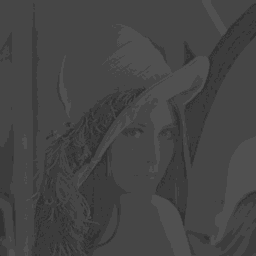

In [ ]:
lena = Image.open('/content/lena_gray.bmp').convert('L')

lena_transformation_2 = transformation_2(lena, 10)
lena_transformation_2

c = 20

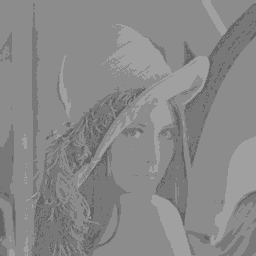

In [ ]:
lena_transformation_2 = transformation_2(lena, 20)
lena_transformation_2

c = 35

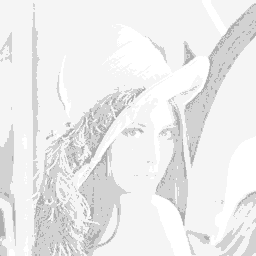

In [ ]:
lena_transformation_2 = transformation_2(lena, 35)
lena_transformation_2

**c) Função que calcula a terceira transformação:    g = c * exp(f + 1)**


In [ ]:
def transformation_3(image, c):
  largura, altura = image.size
  pixels_image = image.load()

  new_image = Image.new("L", (largura, altura))
  data_new_image = new_image.load()

  for x in range(largura):
    for y in range(altura):
      new_pixel_value = c * round(np.exp(pixels_image[x, y] + 1))
      # Normaliza o valor para o intervalo 0 a 255
      new_pixel_value = np.clip(new_pixel_value, 0, 255)
      data_new_image[x, y] = int(new_pixel_value)

  return new_image

Aplicando sobre a imagem **einstein.jpg**:

c = 0.001

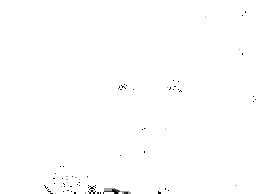

In [ ]:
einstein = Image.open('/content/einstein.jpg').convert('L')
einstein_transformation_3 = transformation_3(einstein, 0.001)
einstein_transformation_3



c = 0.0000000001

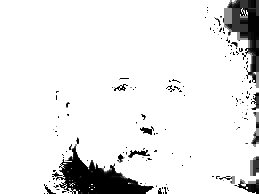

In [ ]:
einstein = Image.open('/content/einstein.jpg').convert('L')

einstein_transformation_3 = transformation_3(einstein, 0.0000000001)
einstein_transformation_3

c = 0.0000000000000001

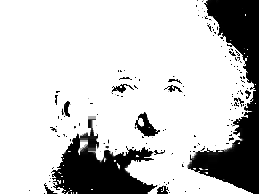

In [ ]:
einstein_transformation_3 = transformation_3(einstein, 0.0000000000000001)
einstein_transformation_3

**5) ESPECIFICANDO HISTOGRAMAS**

A especificação de um histograma é um método utilizado para gerar uma imagem processada que tenha um histograma de formato específico.

In [ ]:
def especificacao(imagem_destino, imagem_origem):
  histograma_origem = [0] * 256
  largura, altura = imagem_origem.size
  pixels_origem = imagem_origem.load()

  for x in range(largura):
      for y in range(altura):
          pixel_valor = pixels_origem[x, y]
          histograma_origem[pixel_valor] += 1

  cdf_origem = [0] * 256
  cdf_origem[0] = histograma_origem[0]

  for i in range(1, 256):
      cdf_origem[i] = cdf_origem[i - 1] + histograma_origem[i]

  histograma_destino = [0] * 256
  largura, altura = imagem_destino.size
  pixels_destino = imagem_destino.load()

  for x in range(largura):
      for y in range(altura):
          pixel_valor = pixels_destino[x, y]
          histograma_destino[pixel_valor] += 1

  cdf_destino = [0] * 256
  cdf_destino[0] = histograma_destino[0]

  for i in range(1, 256):
      cdf_destino[i] = cdf_destino[i - 1] + histograma_destino[i]

  mapping = {}

  min_cdf_origem = min(cdf_origem)
  min_cdf_destino = min(cdf_destino)

  for i in range(256):
      cdf_diff_origem = cdf_origem[i] - min_cdf_origem
      cdf_diff_destino = cdf_destino[i] - min_cdf_destino
      #mapping[i] = round(255 * cdf_diff_destino / cdf_diff_origem)
      if cdf_diff_origem == 0:
            mapping[i] = 0 # Ou qualquer outro valor adequado
      else:
          mapping[i] = round(255 * cdf_diff_destino / cdf_diff_origem)

  #aplicando o mapeamento na imagem de origem
  largura, altura = imagem_origem.size
  pixels_imagem = imagem_origem.load()

  for x in range(largura):
      for y in range(altura):
          pixel_valor = pixels_imagem[x, y]
          novo_pixel_valor = mapping[pixel_valor]
          pixels_imagem[x, y] = novo_pixel_valor

  return imagem_origem

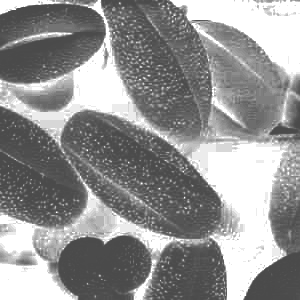

In [ ]:
einstein = Image.open('/content/einstein.jpg').convert('L')
polen = Image.open('/content/polen.png').convert('L')

imagem_especificada = especificacao(einstein, polen)
imagem_especificada